# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [8]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 3.5, random_state=1)

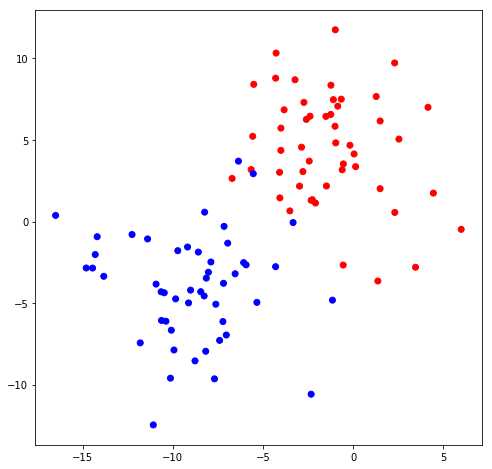

In [9]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [10]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [11]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [12]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [13]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [15]:
print (test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [16]:
print( ridge_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1]


In [17]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.96666666666666667

In [18]:
ridge_classifier.coef_

array([[-0.11164518, -0.0925014 ]])

In [19]:
ridge_classifier.intercept_ 

array([-0.50073421])

#### LogisticRegression

In [20]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [21]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
lr_predictions = log_regressor.predict(test_data)

In [23]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [24]:
print( test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [25]:
print (lr_predictions)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [26]:
print (lr_proba_predictions)

[[  9.99964463e-01   3.55366566e-05]
 [  6.59642915e-01   3.40357085e-01]
 [  7.01850415e-01   2.98149585e-01]
 [  4.73762142e-05   9.99952624e-01]
 [  9.29085437e-01   7.09145630e-02]
 [  4.01441241e-01   5.98558759e-01]
 [  9.99279239e-01   7.20760967e-04]
 [  9.97629335e-01   2.37066452e-03]
 [  9.92246873e-01   7.75312694e-03]
 [  3.08558342e-03   9.96914417e-01]
 [  9.87109827e-01   1.28901728e-02]
 [  8.29682548e-05   9.99917032e-01]
 [  9.70073741e-01   2.99262589e-02]
 [  8.71244984e-04   9.99128755e-01]
 [  1.98341812e-05   9.99980166e-01]
 [  3.57517290e-06   9.99996425e-01]
 [  3.86966857e-01   6.13033143e-01]
 [  9.87062765e-01   1.29372353e-02]
 [  3.75421731e-01   6.24578269e-01]
 [  3.01514496e-06   9.99996985e-01]
 [  1.60068448e-01   8.39931552e-01]
 [  9.99675824e-01   3.24175856e-04]
 [  9.98353859e-01   1.64614060e-03]
 [  1.38720505e-02   9.86127949e-01]
 [  1.19762927e-05   9.99988024e-01]
 [  7.53815726e-05   9.99924618e-01]
 [  9.13128097e-03   9.90868719e-01]
 

In [27]:
print (metrics.accuracy_score(test_labels, lr_predictions))

0.866666666667


In [28]:
print (metrics.accuracy_score(test_labels, ridge_predictions))

0.966666666667


### Оценка качества по cross-validation

#### cross_val_score

In [29]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [30]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [31]:
lr_scoring

array([ 0.8,  1. ,  1. ,  1. ,  1. ,  1. ,  0.8,  1. ,  0.9,  0.9])

In [32]:
print ('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.9700000000000001, max:1.0, min:0.9, std:0.04582575694955839


In [33]:
print( 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.9400000000000001, max:1.0, min:0.8, std:0.07999999999999999


#### cross_val_score с заданными scorer и cv_strategy

In [34]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [35]:
cv_strategy = cross_validation.StratifiedShuffleSplit(blobs[1], n_iter = 20 , test_size = 0.3, random_state = 2)

In [36]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [37]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [38]:
print( 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.958333333333333, max:1.0, min:0.9, std:0.02763853991962833


In [39]:
print( 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.9499999999999998, max:1.0, min:0.8666666666666667, std:0.03574601764921202
